# Model Output Notebook
<img style="float:right;" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png" width=150px>

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

### Description
Read data from ADCIRC output files and plot

---

#### - Requirements
  1. Dewberry ADCIRC Python Library (Python 3.6)
  2. ADCIRC Output Files
  
#### - Usage:
  1. Import Libraries & Assign Paths
  2. Read in data from files:
  3. Add comments/Request feedback
  4. Save Report
  
 ---

#### 1. Import Libraries and paths

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
from adcirc import adcirc
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import HTML
from importlib import reload
import noaa_lib ; reload(noaa_lib)
from noaa_lib import *

In [2]:
root_dir = r'P:\Temp\tmiesse\projects\north_carolina\tidal_test_01_18'
f61 = os.path.join(root_dir,'fort.61.nc')
f62 = os.path.join(root_dir,'fort.62.nc')
f63 = os.path.join(root_dir,'fort.63.nc')
f64 = os.path.join(root_dir,'fort.64.nc')
f73 = os.path.join(root_dir,'fort.73.nc')
f74 = os.path.join(root_dir,'fort.74.nc')
max_f63 = os.path.join(root_dir,'maxele.63.nc')
max_wv63 = os.path.join(root_dir,'maxwvel.63.nc')
max_v63  = os.path.join(root_dir,'maxvel.63.nc')
minpr63  = os.path.join(root_dir,'minpr.63.nc')

## Plot Attributed nodes for all parameters 
*Customize Bounding boxes for each parameter as needed*

#### Water surface elevation and wind velocity within the study area

In [ ]:
title = 'Water Level and Depth Velocity'
lat1,lat2 = 33, 36
lon1,lon2 = -78, -74
file1 = nc4.Dataset(f63)
file2 = nc4.Dataset(f64)
hours,space = 161,15
start = '2005082318'
levels = np.arange(-2, 7.5, 0.25)
adcirc.water_velocity(root_dir,file1,file2,title,hours,levels,lon1,lon2,lat1,lat2,start,space)
HTML('<img width="700" height="500" src="WaterVelocity.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

#### Model Water Level compared to NOAA stations

In [5]:
file = nc4.Dataset(f63)
node = []
x = file.variables['x'][:]
y = file.variables['y'][:]
for ii in range(0,len(x)):
    if x[ii] == -76.67 and y[ii] == 34.72:
        print(ii)

In [7]:
for ii in range(0,len(x)):
    if x[ii] == -76.67 and y[ii] == 34.72:
        print(ii)

In [4]:
station_x = file.variables['x'][:]
station_y = file.variables['y'][:]

In [5]:
station_z = file.variables['zeta'][:,20]

In [6]:
stations = tide_gauges()

In [7]:
start,end = 'begin_date=20180101','end_date=20180131'

In [8]:
hatt  = pd.read_csv(tide_data(start,end,stations[0]['Hatteras']))
duke  = pd.read_csv(tide_data(start,end,stations[1]['Beaufort']))
wright= pd.read_csv(tide_data(start,end,stations[2]['Wrightsville']))

In [9]:
hatt.name,duke.name,wright.name = 'Obs. Hatteras', 'Obs. Beaufort', 'Obs. Wrightsville'

In [10]:
adcirc_hatt   = file.variables['zeta'][:,20]
adcirc_duke   = file.variables['zeta'][:,21]
adcirc_wright = file.variables['zeta'][:,23]

In [11]:
adcirc_hatt.name, adcirc_duke.name,adcirc_wright.name = 'model Hatteras', 'model Beaufort', 'model Wrightsville'

In [19]:
from datetime import datetime, timedelta

In [22]:
date=[]
for i in range (0,44640,10):
    date.append(str('20180101' + timedelta(minutes=i)))

TypeError: must be str, not datetime.timedelta

In [13]:
water_level = [hatt[' Water Level'],duke[' Water Level'],wright[' Water Level'],
               adcirc_hatt,adcirc_duke,adcirc_wright]

In [16]:
data = list()
for dataset in water_level:
    water_level1 = dataset[:]
    c_list = ['rgb(51, 204, 51)','rgb(0, 255, 204)',
                  'rgb(0, 204, 255)','rgb(102, 255, 255)',
                  'rgb(0, 102, 153)','rgb(0, 0, 255)',
                  'rgb(51, 51, 255)','rgb(102, 0, 255)',
                  'rgb(153, 153, 255)','rgb(204, 0, 255)',
                  'rgb(255, 51, 204)','rgb(204, 0, 0)',
                  'rgb(255, 153, 0)','rgb(204, 255, 51)',
                  'rgb(0, 153, 0)']
    for x in range(1):
            y=random.randint(1,14)
            color = c_list[y]
    trace = go.Scatter(
            #x = date,
            y = water_level1,
            name = dataset.name,
                line = dict(
                color = color))

    data.append(trace)
layout = go.Layout(dict(title = 'Tidal Test'),
          xaxis = dict(title = 'Time'),
          yaxis = dict(title = 'Water level (m) above NavD88'),                     
          legend= dict(orientation = "h"),
          font = dict(color = 'rgb(255,255,255)'),
          paper_bgcolor = 'rgb(0,0,0)',
          plot_bgcolor = 'rgb(0,0,0)')

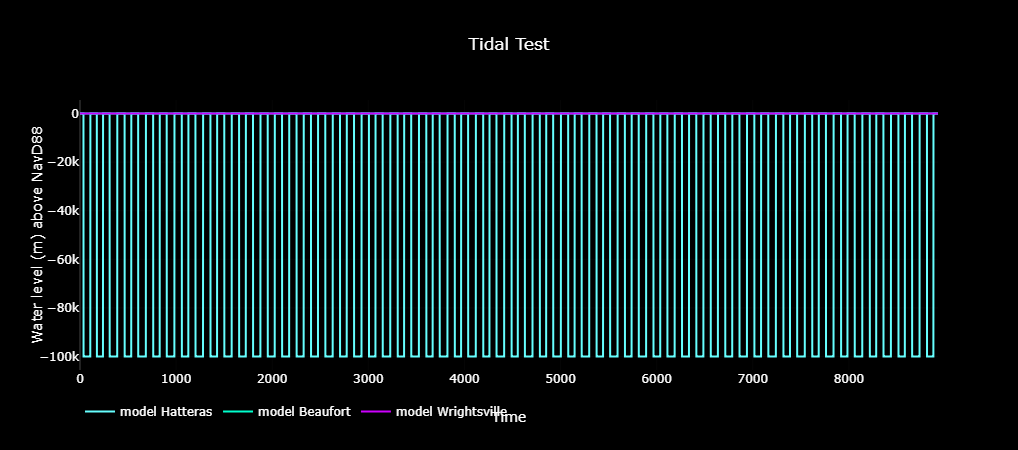

In [17]:
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)

#### Water surface elevation within the study area

In [3]:
title = 'Water Level'
lat1,lat2 = 33, 36
lon1,lon2 = -78, -74
file1 = nc4.Dataset(f63)
hours = 240
levels = np.arange(-2, 7.5, 0.25)
start = '2018010100'
adcirc.global_water(root_dir,file1,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="WaterLevel.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

### Max Water surface elevation in the study area

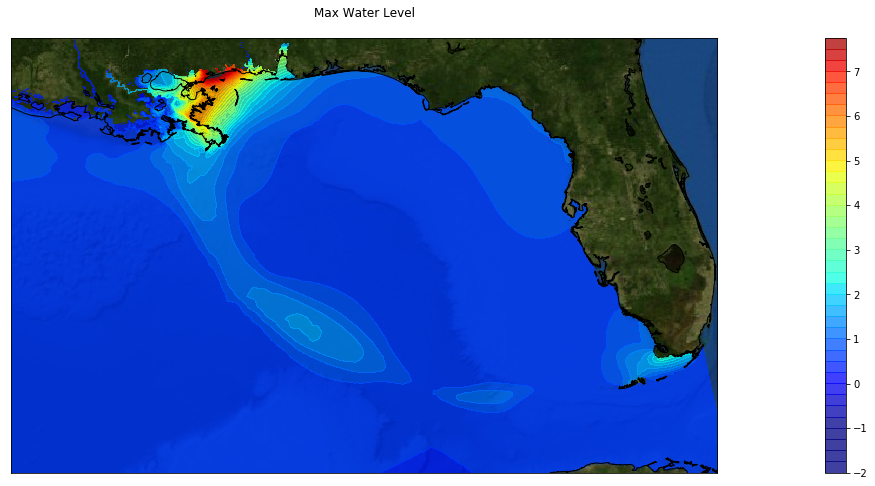

In [3]:
title = 'Max Water Level'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file1 = nc4.Dataset(max_f63)
levels = np.arange(-2, 8, 0.25)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.max_water(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

#### Depth-averaged Velocities within the study area

In [ ]:
title = 'Depth-averaged Velocity'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file2 = nc4.Dataset(f64)
hours,space = 161,15
start = '2005082318'
levels = np.arange(-1, 1, 0.1)
adcirc.global_velocity(root_dir,file2,title,hours,levels,lon1,lon2,lat1,lat2,start,space)
HTML('<img width="700" height="500" src="DepthVelocity.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

### Max Depth-averaged velocity in the study area

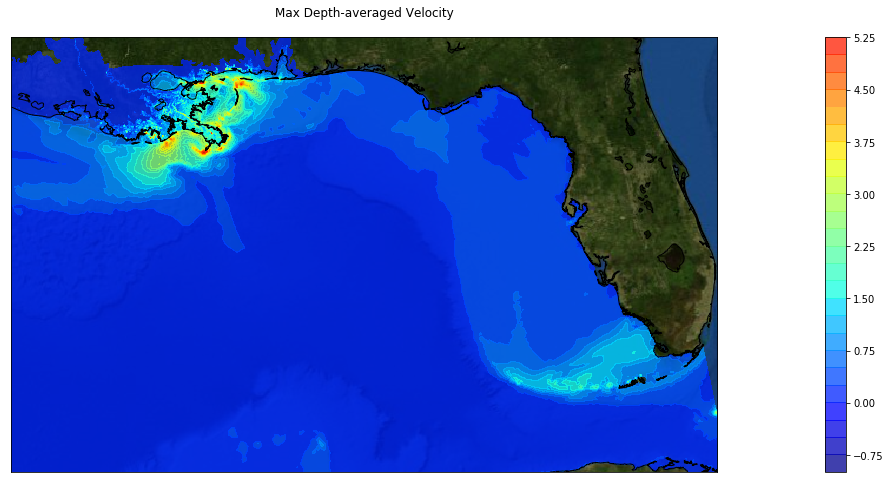

In [3]:
title = 'Max Depth-averaged Velocity'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file1 = nc4.Dataset(max_v63)
levels = np.arange(-1, 5.5, .25)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.max_velocity(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

### Max Wave radiation stress in the study area

#### Atmospheric Pressure and Wind direction within the study area

In [8]:
title = 'Atmoshperic Pressure and Wind Direction'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file3 = nc4.Dataset(f73)
file4 = nc4.Dataset(f74)
hours,space = 161, 20
start = '2005082318'
levels = np.arange(8.9,10.4, 0.05)
adcirc.pressure_wind(root_dir,file3,file4,title,hours,levels,lon1,lon2,lat1,lat2,start,space)
HTML('<img width="700" height="500" src="PressureWind.gif" frameborder="0" allowfullscreen></img>')

#### Atmospheric Pressure within the study area

In [9]:
title = 'Atmospheric Pressure'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file3 = nc4.Dataset(f73)
hours = 161
start = '2005082318'
levels = np.arange(8.9,10.4, 0.05)
adcirc.global_pressure(root_dir,file3,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="AtmosphericPressure.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

### Min Pressure in the study area

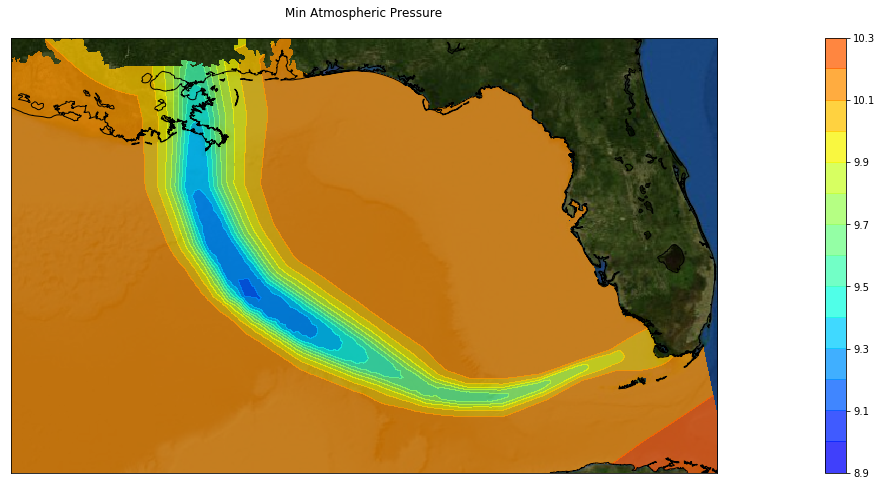

In [5]:
title = 'Min Atmospheric Pressure'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file1 = nc4.Dataset(minpr63)
levels = np.arange(8.9, 10.4, 0.1)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.min_pressure(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

#### Wind Stress or Velocity within the study area

In [ ]:
title = 'Wind Direction'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
hours,space = 161,20
start = '2005082318'
file4 = nc4.Dataset(f74)
levels = np.arange(9.9,10.9, 0.1)
adcirc.global_wind(root_dir,file4,title,hours,levels,lon1,lon2,lat1,lat2,start,space)
HTML('<img width="700" height="500" src="WindVelocity.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>QC Comments: (date if applicable)</font> 
---

##### <font color='blue'>QC Response</font>
---

#### Max Wind Velocities within the study area

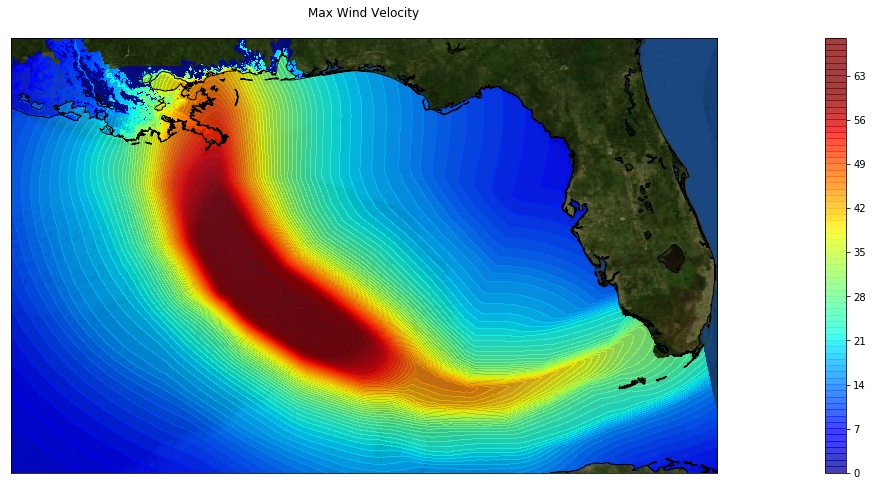

In [6]:
title = 'Max Wind Velocity'
lat1,lat2 = 23, 31
lon1,lon2 = -93, -80
file1 = nc4.Dataset(max_wv63)
levels = np.arange(0, 70, 1)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.max_wind(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)